In [ ]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets #to generate a regression dataset
from torch import nn

In [ ]:
#prepare data
x_numpy, y_numpy=datasets.make_regression(n_features=1,noise=10,random_state=1)
#convert them into torch tensor
x_torch=torch.from_numpy(x_numpy.astype(np.float32))
y_torch=torch.from_numpy(y_numpy.astype(np.float32))
y_torch=y_torch.view(y_torch.shape[0],1)

In [ ]:
#model
model=nn.Linear(y_torch.shape[1],1)

In [ ]:
#loss & optimizer
criteria=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)

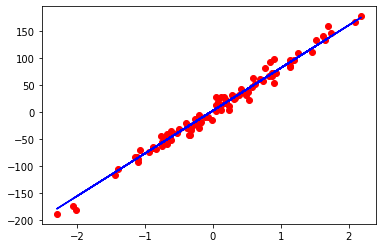

In [ ]:
#training
for epoch in range(250):
  #forward pass and loss
  y_pred=model(x_torch)
  loss=criteria(y_pred,y_torch)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  optimizer.zero_grad()
pred=model(x_torch).detach()
#ploting 
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,pred,'b')
plt.show()